In this notebook, we will be building our model for the open-world experiments to multi-class classify 95 monitored website traces with unique labels against additional unmonitored websites.

# Extracting Data

To begin, we will first import the dataframes into this notebook

In [1]:
import pickle

In [2]:
with open('datasets/extracted_features.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df

,label,incoming_packet_counts,outgoing_packet_counts,total_packet_counts,incoming_packet_fraction,outgoing_packet_fraction,std_outgoing_order,avg_outgoing_order,sum_concentration,avg_concentration
0,0,1300,121,1421,0.914849,0.085151,515.483953,773.322314,10.14,0.007136
1,0,438,80,518,0.845560,0.154440,139.231951,226.162500,10.16,0.019614
2,0,1240,118,1358,0.913108,0.086892,472.735508,786.110169,11.11,0.008181
3,0,1324,122,1446,0.915629,0.084371,513.916038,820.139344,13.36,0.009239
4,0,1291,115,1406,0.918208,0.081792,503.993490,789.608696,10.64,0.007568
...,...,...,...,...,...,...,...,...,...,...
28995,-1,4180,413,4593,0.910081,0.089919,1173.380403,2549.414044,32.09,0.006987
28996,-1,4663,447,5110,0.912524,0.087476,1621.869237,3062.015660,38.62,0.007558
28997,-1,302,59,361,0.836565,0.163435,118.245320,179.101695,34.93,0.096759
28998,-1,413,96,509,0.811395,0.188605,166.667122,309.197917,11.84,0.023261


# Feature Importance

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming df2 is the given dataset with features and target
X = df.drop(columns=['label'])  # Replace 'target' with the actual target column name
y = df['label']                 # Replace 'target' with the actual target column name

# Step 1: Split the dataset (train:test = 80:20)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=41)

# Step 2: Normalize the data using the provided StandardScaler function
def scaler_samples(train_X,test_X):
    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    return train_X, test_X
# train_X, test_X = scaler_samples(train_X, test_X)

# Step 3: Train the RandomForest model with specified parameters
rf_model = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=41)
rf_model.fit(train_X, train_y)

# Step 4: Test the trained model and report accuracy and confusion matrix
pred_y = rf_model.predict(test_X)
accuracy = accuracy_score(test_y, pred_y)
conf_matrix = confusion_matrix(test_y, pred_y)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6853448275862069
Confusion Matrix:
 [[1614    1    4 ...    0    2    1]
 [  10   19    0 ...    0    0    0]
 [  16    0   16 ...    0    0    0]
 ...
 [  18    0    0 ...   18    0    1]
 [   2    0    0 ...    0   38    0]
 [  21    0    0 ...    1    0   24]]


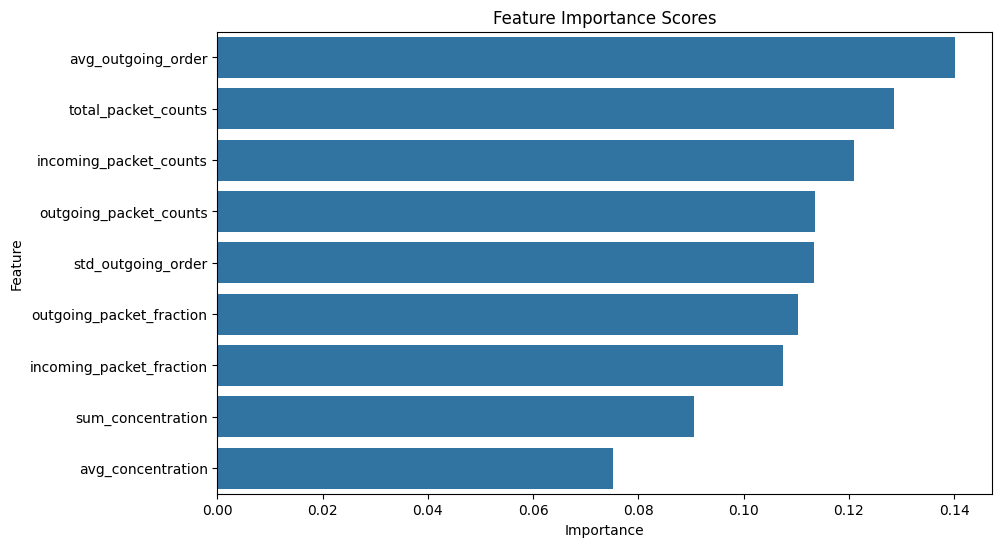

In [9]:
# Step 5: Plot feature importances using seaborn
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Scores')
plt.show()

# Constructing Model

# Model Tuning